# House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.shape

(545, 13)

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preprocessing

In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Analysis & Visualization

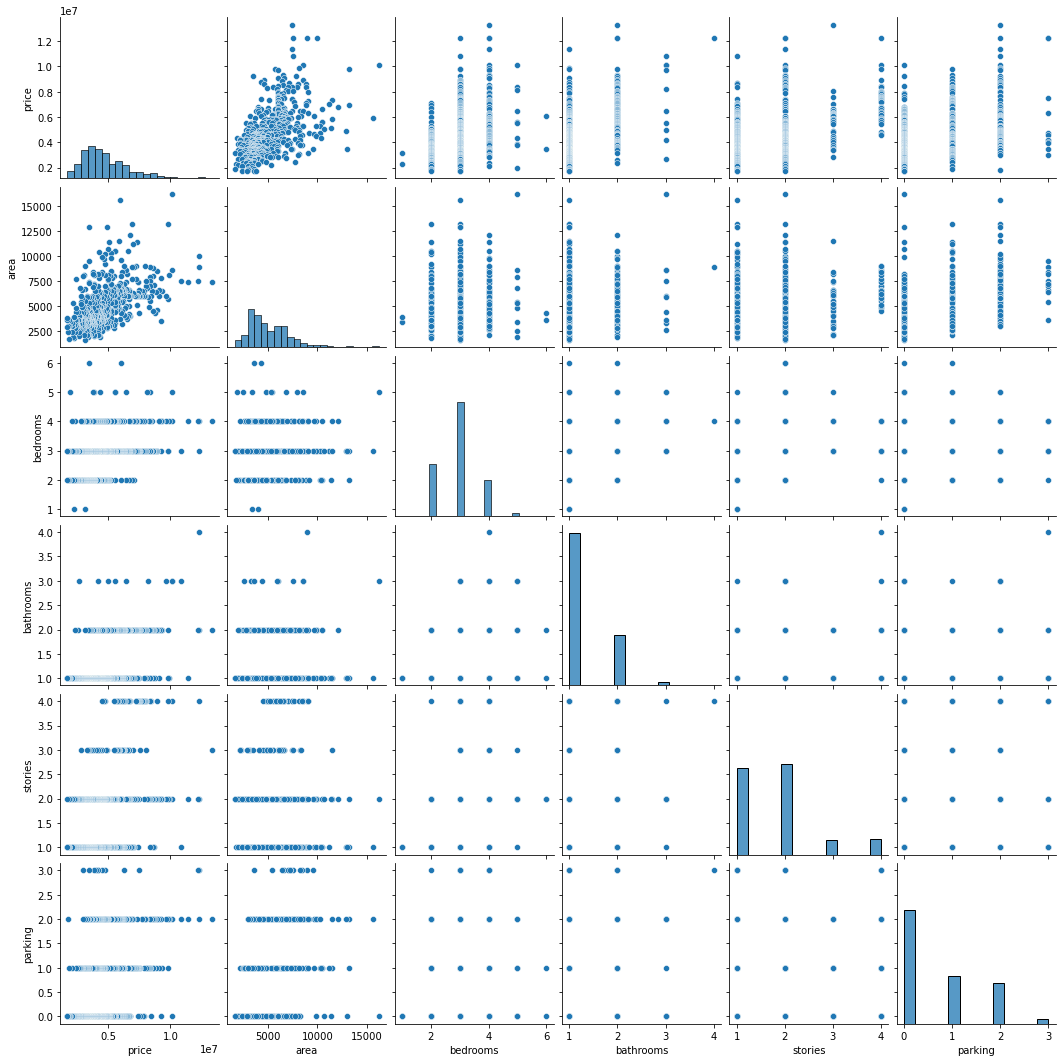

In [9]:
sns.pairplot(data=df)

### 1. area

<AxesSubplot:xlabel='area', ylabel='price'>

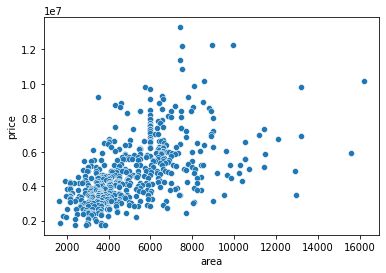

In [10]:
sns.scatterplot(x='area', y='price', data=df)

<AxesSubplot:xlabel='area', ylabel='price'>

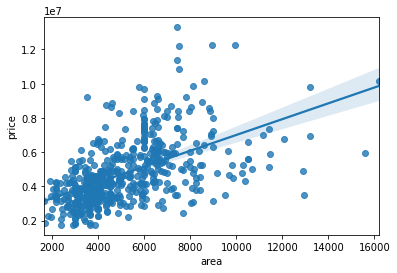

In [11]:
sns.regplot(x='area', y='price', data=df)

<AxesSubplot:xlabel='area'>

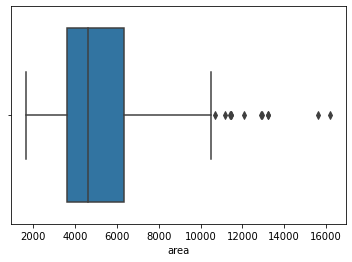

In [12]:
sns.boxplot(df['area'])

<AxesSubplot:xlabel='area', ylabel='Density'>

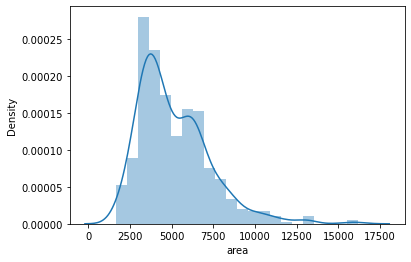

In [13]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area', ylabel='Count'>

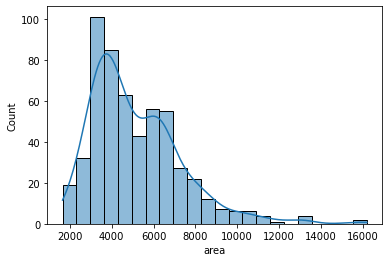

In [14]:
sns.histplot(df['area'], kde=True)

### 2. bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

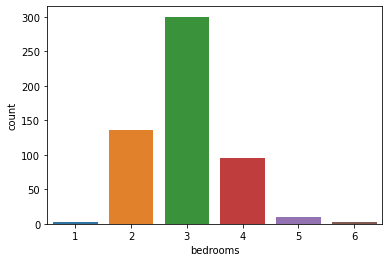

In [15]:
sns.countplot(df['bedrooms'])

### 3. bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

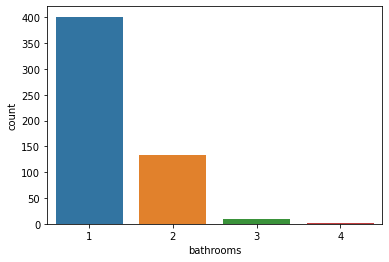

In [16]:
sns.countplot(df['bathrooms'])

### stories

<AxesSubplot:xlabel='stories', ylabel='count'>

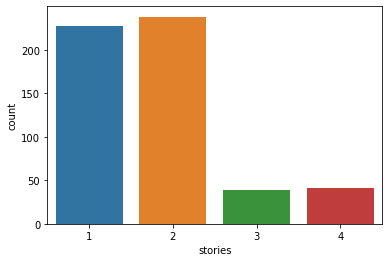

In [17]:
sns.countplot(df['stories'])

### mainroad

<AxesSubplot:xlabel='mainroad', ylabel='count'>

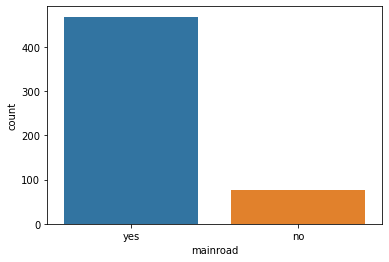

In [18]:
sns.countplot(df['mainroad'])

### guestroom

<AxesSubplot:xlabel='guestroom', ylabel='count'>

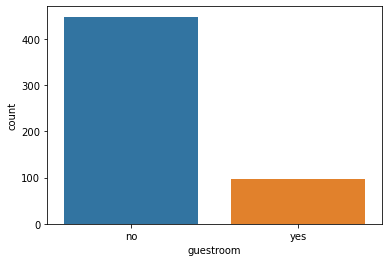

In [19]:
sns.countplot(df['guestroom'])

### basement

<AxesSubplot:xlabel='basement', ylabel='count'>

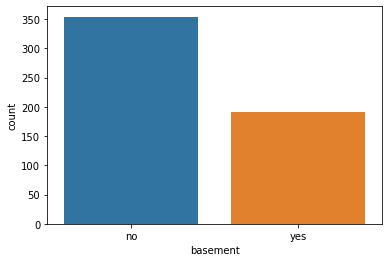

In [20]:
sns.countplot(df['basement'])

### hotwaterheating

<AxesSubplot:xlabel='hotwaterheating', ylabel='count'>

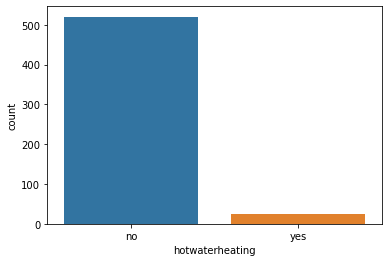

In [21]:
sns.countplot(df['hotwaterheating'])

<AxesSubplot:xlabel='airconditioning', ylabel='count'>

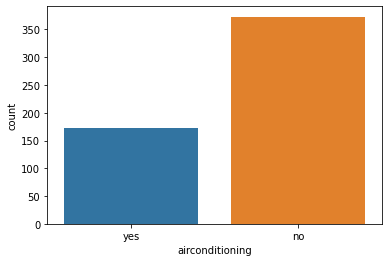

In [22]:
sns.countplot(df['airconditioning'])

<AxesSubplot:xlabel='parking', ylabel='count'>

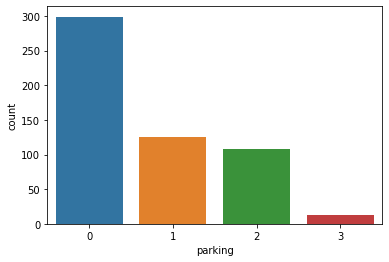

In [23]:
sns.countplot(df['parking'])

<AxesSubplot:xlabel='prefarea', ylabel='count'>

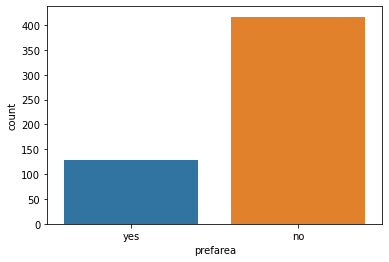

In [24]:
sns.countplot(df['prefarea'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

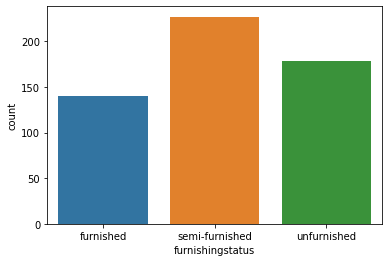

In [25]:
sns.countplot(df['furnishingstatus'])

## Feature Engineering

In [26]:
input_cols = ['area','bedrooms','bathrooms','stories','basement','airconditioning','parking','furnishingstatus']

In [27]:
target = 'price'

In [28]:
input_df = df[input_cols].copy()

In [29]:
input_df

,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus
0,7420,4,2,3,no,yes,2,furnished
1,8960,4,4,4,no,yes,3,furnished
2,9960,3,2,2,yes,no,2,semi-furnished
3,7500,4,2,2,yes,yes,3,furnished
4,7420,4,1,2,yes,yes,2,furnished
...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,2,unfurnished
541,2400,3,1,1,no,no,0,semi-furnished
542,3620,2,1,1,no,no,0,unfurnished
543,2910,3,1,1,no,no,0,furnished


### Encoding Categorical Variables

In [30]:
cat_cols = input_df[input_cols].select_dtypes(include='object').columns.tolist()

In [31]:
cat_cols

['basement', 'airconditioning', 'furnishingstatus']

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [34]:
encoder.fit(input_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [35]:
encoder_cols = list(encoder.get_feature_names(cat_cols))
encoder_cols

['basement_no',
 'basement_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [36]:
input_df[encoder_cols] = encoder.transform(input_df[cat_cols])

In [37]:
input_df.drop(cat_cols, axis=1, inplace=True)

In [38]:
input_df

,area,bedrooms,bathrooms,stories,parking,basement_no,basement_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
input_df.dtypes

area                                 int64
bedrooms                             int64
bathrooms                            int64
stories                              int64
parking                              int64
basement_no                        float64
basement_yes                       float64
airconditioning_no                 float64
airconditioning_yes                float64
furnishingstatus_furnished         float64
furnishingstatus_semi-furnished    float64
furnishingstatus_unfurnished       float64
dtype: object

### Scale Numerical Variable

In [40]:
num_cols = input_df.select_dtypes(include='int64').columns.tolist()

In [41]:
num_cols

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(input_df[num_cols])

StandardScaler()

In [45]:
input_df[num_cols] = scaler.transform(input_df[num_cols])

In [46]:
input_df

,area,bedrooms,bathrooms,stories,parking,basement_no,basement_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.757010,1.403419,5.405809,2.532024,2.679409,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.0,1.0,1.0,0.0,0.0,0.0,1.0
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
input_df.dtypes

area                               float64
bedrooms                           float64
bathrooms                          float64
stories                            float64
parking                            float64
basement_no                        float64
basement_yes                       float64
airconditioning_no                 float64
airconditioning_yes                float64
furnishingstatus_furnished         float64
furnishingstatus_semi-furnished    float64
furnishingstatus_unfurnished       float64
dtype: object

In [49]:
target_df = df[target]

In [50]:
target_df

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Training and Testing Data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.25, random_state=0)

In [53]:
x_train

,area,bedrooms,bathrooms,stories,parking,basement_no,basement_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
498,-1.453102,-1.308863,-0.570187,0.224410,-0.805741,1.0,0.0,1.0,0.0,0.0,1.0,0.0
531,0.068934,0.047278,-0.570187,-0.929397,-0.805741,1.0,0.0,0.0,1.0,0.0,0.0,1.0
532,-0.991879,-1.308863,-0.570187,-0.929397,-0.805741,1.0,0.0,1.0,0.0,0.0,0.0,1.0
278,-0.807390,0.047278,-0.570187,0.224410,1.517692,0.0,1.0,1.0,0.0,0.0,1.0,0.0
101,0.161178,0.047278,-0.570187,1.378217,0.355976,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.530656,0.047278,1.421812,0.224410,-0.805741,0.0,1.0,0.0,1.0,0.0,1.0,0.0
277,2.402722,-1.308863,-0.570187,-0.929397,0.355976,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.276484,0.047278,1.421812,2.532024,0.355976,1.0,0.0,0.0,1.0,0.0,0.0,1.0
359,-0.715145,0.047278,-0.570187,-0.929397,0.355976,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
y_train

498    2660000
531    2233000
532    2135000
278    4277000
101    6230000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 408, dtype: int64

## Modeling

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
lr.score(x_train, y_train)

0.6227212054302768

In [72]:
lr.score(x_test, y_test)

0.7022106247101425

In [73]:
y_pred = lr.predict(x_test)

In [74]:
y_pred

array([ 4122017.10739612,  6245989.13117473,  4447560.52922479,
        6992252.18509302,  3294288.52132748,  6928339.17947357,
        3218244.27346343,  3807501.48390075,  2732485.14587955,
        8913539.65091324,  6869894.84041334,  3855410.76247885,
        4165164.74293442,  4618484.15149139,  4443899.5823014 ,
        2263666.16167562,  4495673.71965162,  3833780.30968471,
        4055106.61033468,  4664354.85725417,  6152745.64012271,
        5176945.40815218,  4806370.1686105 ,  2552516.83471584,
        5176254.94411431,  5506417.49665618,  5271124.71208095,
        5274225.67028157,  6174112.76130043,  5506617.01220504,
        3452950.51021869,  4467889.48583223,  6563455.78563881,
        2898515.70020144,  4061395.64648324,  5377418.95265138,
        5600519.54116878,  4034981.6946593 ,  2925747.56012189,
        4097936.73916035,  8630867.60314621,  5901871.82320269,
        6681558.33487465,  3848586.03731853,  3114475.17701226,
        6667280.36324093,  4203723.08444

### Model Evaluation

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_squared_error(y_test, y_pred)

919122588108.7682

In [77]:
lr.intercept_

5045320.089975268

In [79]:
lr.coef_

array([ 681778.42003497,   92502.28392778,  516093.72259454,
        449295.75393512,  218666.25216979, -310562.54293833,
        310562.54293833, -387465.10501982,  387465.10501982,
        247744.50886968,   96743.82523678, -344488.33410646])

In [83]:
pd.DataFrame({'Coef':lr.coef_}, index=input_df.columns.to_list())

,Coef
area,681778.420035
bedrooms,92502.283928
bathrooms,516093.722595
stories,449295.753935
parking,218666.252170
basement_no,-310562.542938
basement_yes,310562.542938
airconditioning_no,-387465.105020
airconditioning_yes,387465.105020
furnishingstatus_furnished,247744.508870


### With All Columns

In [85]:
inputs = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

categorical_cols = inputs.select_dtypes(include='object').columns.tolist()

encoder.fit(inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

inputs.drop(categorical_cols, axis=1, inplace=True)

numerical_cols = inputs.select_dtypes(include='int64').columns.tolist()

inputs[numerical_cols] = scaler.fit_transform(inputs[numerical_cols])

X_train, X_test, Y_train, Y_test = train_test_split(inputs, target_df, test_size=0.30, random_state=0)

lr1 = LinearRegression()

lr1.fit(X_train, Y_train)

Y_pred = lr1.predict(X_test)

print("Training Score:",lr1.score(X_train, Y_train))

print("Testing Score:",lr1.score(X_test, Y_test))

Training Score: 0.6592098113187075
Testing Score: 0.7245629970975956


In [86]:
lr1.intercept_

5697907.848871114

In [88]:
pd.DataFrame({'Coef':lr1.coef_}, index=inputs.columns.to_list())

,Coef
area,534765.253186
bedrooms,94587.415101
bathrooms,475997.270106
stories,365169.986367
parking,188927.928112
mainroad_no,-239130.397402
mainroad_yes,239130.397402
guestroom_no,-192588.052921
guestroom_yes,192588.052921
basement_no,-176769.792283


<AxesSubplot:xlabel='price'>

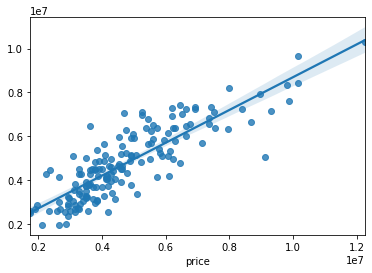

In [89]:
sns.regplot(Y_test, Y_pred)

<AxesSubplot:xlabel='price'>

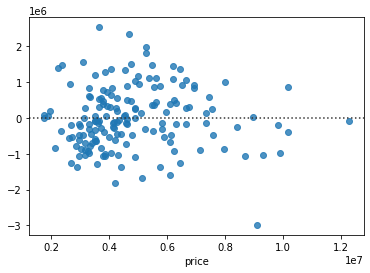

In [90]:
sns.residplot(Y_test, Y_pred)

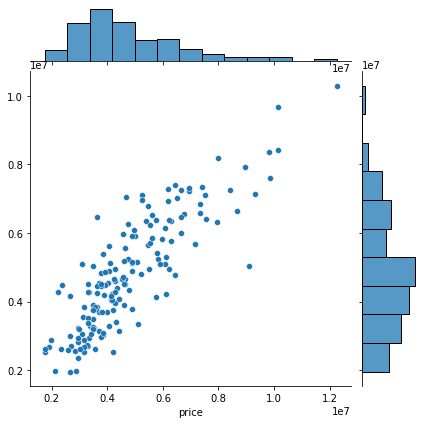

In [91]:
sns.jointplot(Y_test, Y_pred)